# Micro-narrative analysis of _The Lord of the Rings_

In [1]:
import glob
import os.path

docs = []
for file in glob.glob("input/*.txt"):
    with open(file) as f:
        text = f.read()
        sections = text.split("\n")
        for section in sections:
            section = section.strip()
            if section:
                docs.append(section)

In [2]:
from narrativegraphs import NarrativeGraph

if os.path.exists("lotr.db"):
    model = NarrativeGraph.load("lotr.db")
else:
    model = NarrativeGraph(
        sqlite_db_path="lotr.db",
        on_existing_db="overwrite"
    ).fit(docs)

INFO:narrativegraphs.pipeline:Adding 9240 documents to database
INFO:narrativegraphs.pipeline:Extracting triplets
Extracting triplets: 100%|██████████| 9240/9240 [00:48<00:00, 189.84it/s] 
INFO:narrativegraphs.pipeline:Resolving entities and predicates
INFO:narrativegraphs.pipeline:Mapping triplets and tuplets
INFO:narrativegraphs.pipeline:Calculating stats


In [4]:
model.cooccurrences_

id     entity_one  entity_one_frequency       entity_two  \
0        1          tales                     6      the telling   
1        2      The story                     7  the older world   
2        3      The story                     7      The process   
3        4      The story                     7      the writing   
4        5  The discovery                     1        The story   
...    ...            ...                   ...              ...   
7333  7334   the High Sea                     1            Frodo   
7334  7335          Merry                    63         the ship   
7335  7336          Merry                    63     the High Sea   
7336  7337   the High Sea                     1         the ship   
7337  7338            Sam                   183          Bywater   

      entity_two_frequency  frequency  doc_frequency    spread  \
0                        1          1              1  0.000108   
1                        1          1              1  0.000108   
2                        1          1              1  0.000108   
3                        1          1              1  0.000108   
4                        7          1              1  0.000108   
...                    ...        ...            ...       ...   
7333                   255          1              1  0.000108   
7334                     3          1              1  0.000108   
7335                     1          1              1  0.000108   
7336                     3          1              1  0.000108   
7337                     2          1              1  0.000108   

      adjusted_tf_idf       pmi  entity_one_id  entity_two_id  
0                 0.0  3.103918           1603           2287  
1                 0.0  3.036971           1472           1756  
2                 0.0  3.036971           1472           1517  
3                 0.0  3.036971           1472           2118  
4                 0.0  3.036971           1118           1472  
...               ...       ...            ...            ...  
7333              0.0  1.475529           1240           3239  
7334              0.0  1.605607            642           1507  
7335              0.0  2.082728            642           1240  
7336              0.0  3.404948           1240           1507  
7337              0.0  1.318588           1609           1869  

[7338 rows x 12 columns]

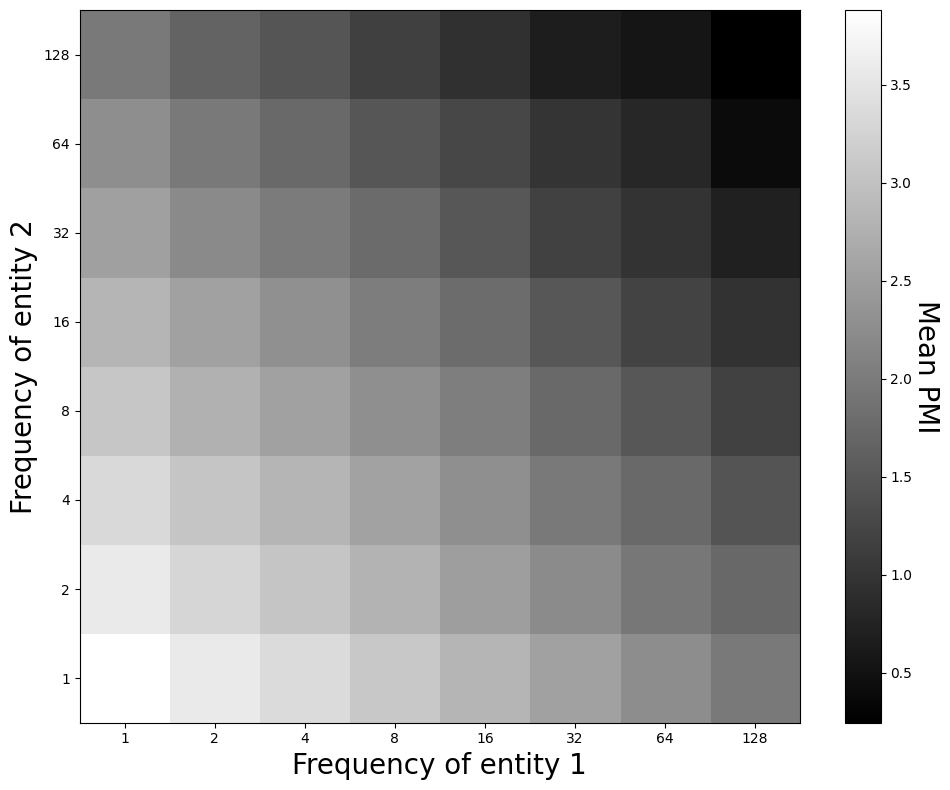

In [5]:
from sharedutils import visualize_pmi_by_frequency

visualize_pmi_by_frequency(model.cooccurrences_)

In [5]:
from narrativegraphs import GraphFilter

graph_filter = GraphFilter(
    minimum_edge_frequency=2,
    minimum_node_frequency=2,
    maximum_node_frequency=100,
    maximum_edge_doc_frequency=20
)

In [12]:
comms = model.graph.find_communities(
    graph_filter=graph_filter,
    min_weight=2,
    community_detection_method_args=dict(k=3)
)

for comm in sorted(comms, key=lambda c: c.score, reverse=True):
    if len(comm.members) < 2: continue
    print(*[e.label for e in comm.members], sep=", ")
    print()

O Orofarnë, Lassemista, Carnimírië

the upper portion, his reach, a loose veil

the spider, the hawk, the eagle's foot

the left-hand passage, the same general direction, only brief halts, the right-hand, the middle way, three passages

early evening, the bare branches, the dark pines, The East Wind

Mauhúr, better night-eyes, his lads, Whiteskins

a few mouthfuls, lembas_, his master's face

his large mouth, A sneer, dark scornful eyes

the right way, thirteen dwarves, one hobbit

a snow-mountain, a lass, as merry

faint drums, wooded hills, a blanket

your death, this death, your people, your father, your part

a cold rain, A shudder, the slap, a keen air

West-door, a direct line, East-gate, our way

iron rim, the coat, a black cap, a tunic, a full-sized orc, stout ring-mail

the beans, long clouds, red flowers, pale morning, soiled wool, the sunrise

his nose, a wide-brimmed hat, the hood

Esgaroth on the Long Lake, ancient history, my _birthday, the occasion, my memory, a fact, th

In [11]:
comms = model.graph.find_communities(
    graph_filter=graph_filter,
    community_detection_method="louvain",
    min_weight=1.5,
    community_detection_method_args=dict(resolution=5)
)
for comm in sorted(comms, key=lambda c: c.score, reverse=True):
    members = [e.label for e in comm.members]
    print(*members, sep=", ")
    print()

The thieves, my precious

O Orofarnë, Lassemista, Carnimírië

my news, no accident

your whole plan, your plans

a secret gate, A new road

Forest River, whose folk

Captain of Gondor, your city

your glass, your box

the upper portion, his reach, a loose veil

the spider, the hawk, the eagle's foot

Ilmarin, the strand

hideous arms, black tunnels

many footprints, much scent

no dint, your hat

the great stone slab, six feet

the blessing, the left eye

a grasshopper, a jump

a vast crescent, the nearest point

his little fire, the sunny bank

intricate shape, two great black keys

low well-laid hedges, a huge turnip-field

the Lords of the Mark, the twenty-first, the Chamber of Mazarbul, their supper, Fréa, the Hall, Fréawine, Goldwine, Helm's Deep, the narrow bridge, Folca, Aldor brother, the funeral, Young, Thengel, open war, Brego, Léofa, Gram, the garrison, The Men of the Mark, the mounds, our visits, the west-side, Folcwine, the hapless, Helm, the east-side, golden halls, Déor,

In [3]:
# create server to be viewed in own browser which blocks execution of other cells
model.serve_visualizer()

INFO:     Started server process [10912]
INFO:     Waiting for application startup.
INFO:root:Database engine provided to state before startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8001 (Press CTRL+C to quit)


INFO:     127.0.0.1:56410 - "GET / HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:56410 - "GET /vis HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:56413 - "GET /graph/bounds HTTP/1.1" 200 OK
INFO:     127.0.0.1:56413 - "OPTIONS /graph HTTP/1.1" 200 OK
INFO:     127.0.0.1:56413 - "POST /graph HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:56413 - "OPTIONS /graph/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:56413 - "POST /graph/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:56413 - "GET /entities/15 HTTP/1.1" 200 OK
INFO:     127.0.0.1:56421 - "GET /entities/15/docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:56433 - "GET /entities/3 HTTP/1.1" 200 OK
INFO:     127.0.0.1:56437 - "GET /entities/3/docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:56477 - "OPTIONS /entities/search/grish HTTP/1.1" 200 OK
INFO:     127.0.0.1:56477 - "GET /entities/search/grish HTTP/1.1" 200 OK
INFO:     127.0.0.1:56477 - "POST /graph HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:56477 - "POST /graph/ HTTP/1.1" 200 O

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [10912]
INFO:root:Server stopped by user
